In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_csv('Social_Network_Ads.csv')

In [35]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
df = df.iloc[:,2:]

In [39]:
df.sample(5)

,Age,EstimatedSalary,Purchased
75,34,112000,1
136,20,82000,0
95,35,44000,0
373,59,130000,1
156,46,59000,0


# Train Test Split

- In Feature Engineering it's better to do ```Train Test Split```. You can skip it. But it's always recommneded to do that.

📌এখানে `train_test_split()` ফাংশনটা `df` ডেটাসেটকে দুই ভাগে ভাগ করে—একটা ট্রেনিং সেট (`X_train`, `y_train`) আর একটা টেস্ট সেট (`X_test`, `y_test`)।  

- **`df.drop('Purchased', axis=1)`** → এটা `df` থেকে `Purchased` কলাম বাদ দিয়ে শুধু ফিচারগুলোর (`X`) ডেটা রাখছে।  
- **`df['Purchased']`** → এটা শুধু `Purchased` কলামের ডেটা নিচ্ছে, যেটা আমাদের টার্গেট ভ্যারিয়েবল (`y`)।  
- **`test_size=0.3`** → ডেটার ৩০% টেস্ট সেটের জন্য রাখা হচ্ছে, আর ৭০% ট্রেনিং সেটে যাবে।  
- **`random_state=0`** → ফিক্সড র‍্যান্ডম স্টেট দেওয়া হয়েছে, যাতে প্রতিবার কোড রান করলেও একই ভাগ পাওয়া যায়।  

`X_train.shape, X_test.shape` দিলে ট্রেনিং আর টেস্ট ডেটাসেটের **(rows, columns)** সংখ্যা দেখা যাবে। এটা ট্রেনিং ৭০% আর টেস্ট ৩০% হিসেবে ভাগ হয়ে যাবে।

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **🚀 `StandardScaler` কী এবং কেন দরকার?**  
তোমার ডেটাসেটে বিভিন্ন ফিচারের **রেঞ্জ (scale) একরকম নাও হতে পারে**। ধরো—  

| Age (বয়স) | Salary (বেতন) | Purchased |
|-----------|------------|-----------|
| 45        | 60000      | 1         |
| 29        | 52000      | 0         |
| 35        | 58000      | 1         |

এখানে **বয়স (Age)** এর মান ২০-৬০ এর মধ্যে, কিন্তু **বেতন (Salary)** অনেক বড় সংখ্যা (হাজার বা লাখ)।  
📌 **সমস্যা:** মেশিন লার্নিং মডেলগুলো **বড় স্কেলের ফিচারকে বেশি গুরুত্ব দেয়**, যা ভুল হতে পারে!  

💡 **সমাধান:** `StandardScaler()` ব্যবহার করে **সব ফিচারকে একই স্কেলে নিয়ে আসতে হবে**, যাতে তাদের প্রভাব সমান হয়।  

---

### **🔍 `StandardScaler` কীভাবে কাজ করে?**  
`StandardScaler()` প্রতিটি ফিচারকে এইভাবে **স্কেল (normalize) করে**—  

$$
X_{\text{scaled}} = \frac{X - \text{mean}(X)}{\text{std}(X)}
$$


এখানে:  
- **mean(X)** → পুরো ডেটার **গড় (mean)** বের করে  
- **std(X)** → পুরো ডেটার **স্ট্যান্ডার্ড ডিভিয়েশন (std)** বের করে  
- প্রতিটি ভ্যালু থেকে **গড় বাদ দিয়ে** স্ট্যান্ডার্ড ডিভিয়েশন দিয়ে ভাগ করে  

এতে প্রতিটি ফিচার **0 কে কেন্দ্র করে স্কেল হয়ে যায়, এবং স্ট্যান্ডার্ড ডিভিয়েশন 1 হয়**।  

---

### **📌 ধাপে ধাপে কোড ব্যাখ্যা:**  

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # ➊ স্কেলার অবজেক্ট তৈরি করা হলো
```
এখানে `scaler` নামের **একটা StandardScaler অবজেক্ট তৈরি করা হলো**, যা আমাদের ডেটা ট্রান্সফর্ম করবে।  

---

```python
scaler.fit(X_train)  # ➋ X_train থেকে গড় ও স্ট্যান্ডার্ড ডিভিয়েশন শেখা হচ্ছে
```
👉 **এখানে `X_train` থেকে mean এবং std শিখে নেয়া হচ্ছে।**  
⚠️ **কেবলমাত্র `X_train` দিয়েই `fit()` করতে হবে, `X_test` দিয়ে নয়!**  
কারণ, **মডেলকে শুধু ট্রেনিং ডেটার ভিত্তিতে স্কেল করা শেখানো হয়**।  

---

```python
X_train_scaled = scaler.transform(X_train)  # ➌ শেখা রুল দিয়ে X_train স্কেল করা হলো
```
👉 **এখানে `X_train`-এর প্রতিটি ফিচার `StandardScaler` ফর্মুলা দিয়ে স্কেল করা হয়েছে।**  
এখন `X_train_scaled` ডেটার **গড় হবে 0 এবং স্ট্যান্ডার্ড ডিভিয়েশন হবে 1**।  

---

```python
X_test_scaled = scaler.transform(X_test)  # ➍ X_test-কে শেখা রুল দিয়ে স্কেল করা হলো
```
👉 **এখানে `X_test`-কেও স্কেল করা হয়েছে, কিন্তু নতুন করে `fit()` করা হয়নি।**  
⚠️ **মনে রাখবে, `X_test`-এ শুধু transform() করতে হয়, fit() করা হয় না!**  
কারণ **X_test-কে `X_train` থেকে শেখা mean & std দিয়েই স্কেল করতে হবে**।  

---

### **📊 স্কেলিং আগে ও পরে ডেটার তুলনা:**  
ধরো, **স্কেলিংয়ের আগে `X_train` এর প্রথম কয়েকটা রো ছিল:**  
```
[[ 45, 60000, 1], 
 [ 29, 52000, 0]]
```
**স্কেলিংয়ের পর `X_train_scaled` হবে:**  
```
[[ 0.8, 1.1, 1.2], 
 [-0.9, -0.6, -0.8]]
```
এখানে দেখা যাচ্ছে, **সব ভ্যালু এখন একটা নির্দিষ্ট রেঞ্জে চলে এসেছে, যেখানে mean = 0 এবং std = 1**।  

---

### **💡 কেন `StandardScaler` দরকার?**  
✅ **ফিচারগুলোর স্কেল ঠিক করে**, যাতে কোনো ফিচার অন্যটার চেয়ে বেশি গুরুত্ব না পায়।  
✅ **মডেলের কনভার্জেন্স দ্রুত হয়** এবং পারফরম্যান্স ভালো হয়।  
✅ বিশেষ করে **লজিস্টিক রিগ্রেশন, কেএনএন, এসভিএম-এর মতো মডেলগুলোর পারফরম্যান্স বাড়ায়**।  

---

### **📌 সঠিক কোড:**  
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

scaler.fit(X_train)  # X_train থেকে mean & std শেখা হচ্ছে

X_train_scaled = scaler.transform(X_train)  # শেখা রুল দিয়ে X_train স্কেল করা
X_test_scaled = scaler.transform(X_test)    # X_train থেকে শেখা রুল দিয়ে X_test স্কেল করা
```
এখন **`X_train_scaled` ও `X_test_scaled` ডেটা মডেলের জন্য প্রস্তুত! 🚀**

In [50]:
scaler.mean_ # scaler.mean_ হলো fit(X_train) চালানোর পর প্রতিটি ফিচারের গড় (mean) সংরক্ষণ করা অ্যাট্রিবিউট, যা transform() করার সময় স্কেলিংয়ে ব্যবহৃত হয়।

array([3.78642857e+01, 6.98071429e+04])

In [52]:
type(X_train) # X_trian ekta pandas dataframe. But amra jokhon  etake scaling kori tokhon eta numpy array hoye jay. amader kaj holo etake abar pandas dataframe banano.

pandas.core.frame.DataFrame

In [54]:
type(X_train_scaled) # X_train_scaled numpy array hoye geche

numpy.ndarray

In [66]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

# DataFrame korar somoy columns = X_train.columns use korar karon holo X_train er exact column name jeno X_train_scaled teo thake. eta use na korle random column name generate hobe.

In [68]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [72]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


### 🔹 **Short Note on `np.round(X_train.describe(), 1)`**  

✔ **`X_train.describe()`** ডেটাসেটের সংখ্যা ভিত্তিক কলামের **সারাংশ (mean, std, min, max, etc.)** দেখায়।  
✔ **`np.round(..., 1)`** সব মানকে **১ দশমিক স্থানে রাউন্ড** করে, যাতে ডেটা **পরিষ্কার ও সহজে বোঝার মতো হয়**।  
✔ এটি **ডেটা বিশ্লেষণ সহজ করে** এবং **বিন্যাস সুন্দর রাখে**। 🚀

In [77]:
np.round(X_train_scaled.describe(),1) # ekhane amra dekhbo X_train er upor transform korar por j X_train_scaled paichi setar mean 0 hoyeche and std 1 hoyeche.

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect Of Scaling

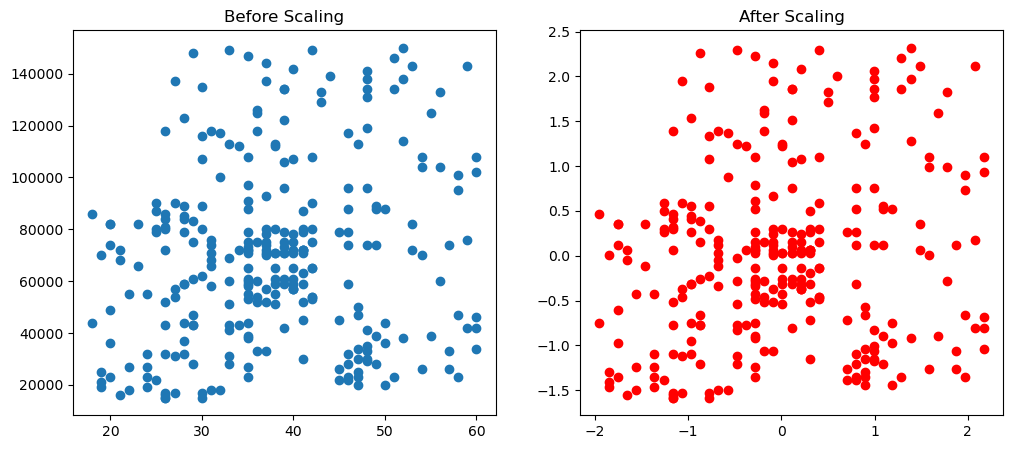

In [132]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))


ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='r')


# scatter plot e dekhte pacchi amader scaled korar por mean 0.0 hoye geche.

ax1.set_title("Before Scaling")
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'After Scaling'}, ylabel='Density'>

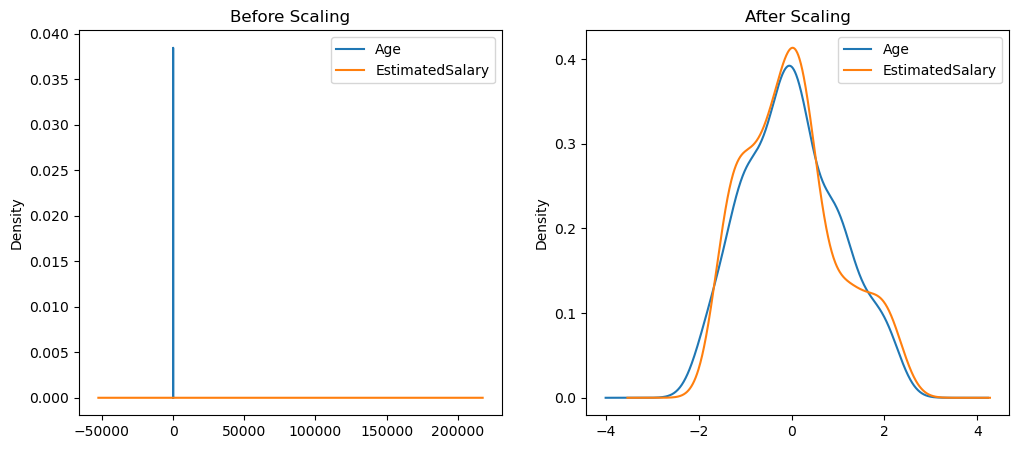

In [148]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
X_train[['Age','EstimatedSalary']].plot(kind='kde',ax=ax1)

ax2.set_title('After Scaling')
X_train_scaled[['Age','EstimatedSalary']].plot(kind='kde',ax=ax2)


- Scaling korar age age and salary er majhe kono relation e nai. onk difference. But scaling korar pore age and salary er range pray kachakachi hoye gece.

# Comparison of Distribution

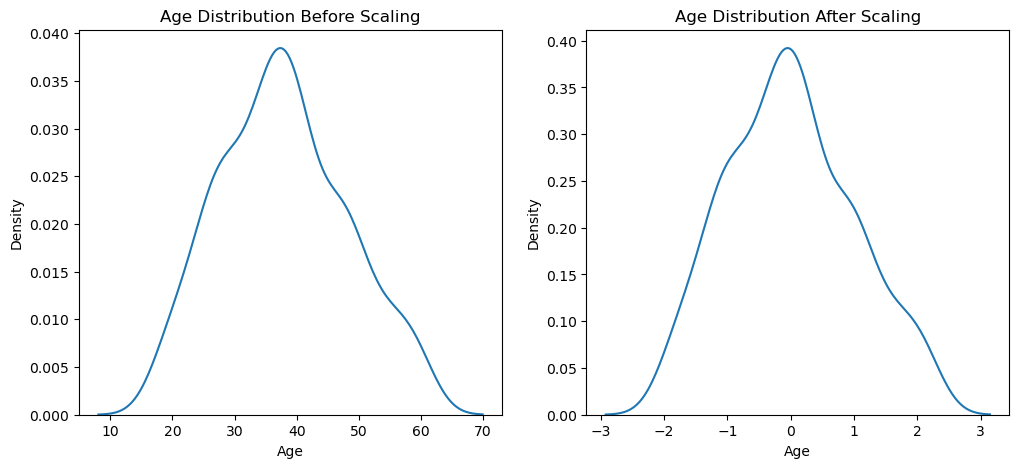

In [162]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

plt.show()

- scale korar age and pore shape same e ache, but mean,std egula change hoyeche. mean=0 and std=1 hoyeche

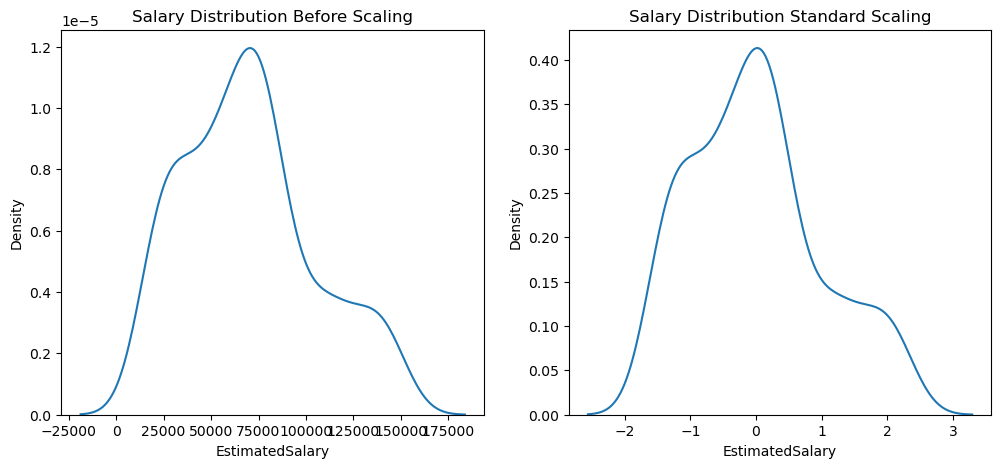

In [165]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why Scaling is important

- data k scale korar por jokhon amra model trian kori sekhane accuracy beshi thake, that's why scaling is important. 
- If we use ```linear ligistic regression``` then we must scale our data to gain the most accurate result.
- But if we use ```DecisionTreeClassifier``` then we don't need to scale the data as it gives the same accuracy.

For now we will just see the codes and try to catch the concept, later we will learn details about this when we will learn ```liear logistic regression``` and ```Decision tree```.

In [169]:
from sklearn.linear_model import LogisticRegression


In [171]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()


In [173]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [175]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [177]:
from sklearn.metrics import accuracy_score


In [179]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


___
👉🏻__Now for ```decision tree```__ 👇

In [185]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [190]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [192]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [194]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [196]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of outlier

In [207]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 
                                  'EstimatedSalary': [1000, 250000, 350000], 
                                  'Purchased': [0, 1, 1]})], 
               ignore_index=True)


# ekhane amra notun ekta dataframe baniyechi jekhane outliers ache and ekate concat kore diyechi ager dataframe er sathe. 
# concat means amra ager tar sathe add kore diyechi


In [209]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,250000,1
402,95,350000,1
403,5,1000,0
404,90,250000,1


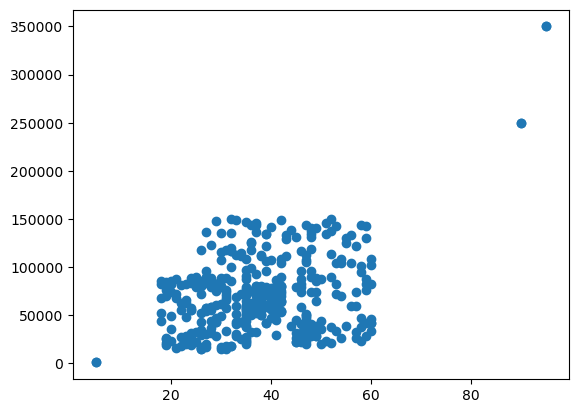

In [211]:
plt.scatter(df['Age'], df['EstimatedSalary'])


In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((284, 2), (122, 2))

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [217]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

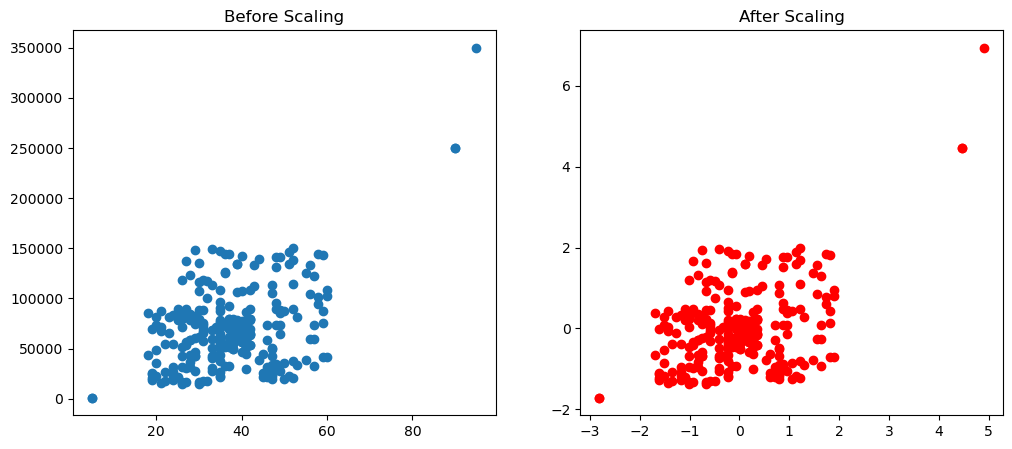

In [219]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

- amra abar ager moto ```train test split``` korlam , ```standardization``` korlam, kore ```plot``` kore dekhlam j outlier ache.
- ei outlier gula ```standardization``` korar poreo reduce hoyni. Outlier e roye geche. Tai amader k egula handle korte hobe.